In [25]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [26]:
#Read the dataset
df=pd.read_csv('dataset/data_date.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16287 entries, 0 to 16286
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       16287 non-null  object
 1   Country    16287 non-null  object
 2   Status     16287 non-null  object
 3   AQI Value  16287 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 509.1+ KB


#### General Informations about the dataset

In [27]:
print(df.shape)
print(df.columns)
print(df.head(5))

(16287, 4)
Index(['Date', 'Country', 'Status', 'AQI Value'], dtype='object')
         Date    Country                          Status  AQI Value
0  2022-07-21    Albania                            Good         14
1  2022-07-21    Algeria                        Moderate         65
2  2022-07-21    Andorra                        Moderate         55
3  2022-07-21     Angola  Unhealthy for Sensitive Groups        113
4  2022-07-21  Argentina                        Moderate         63


In [28]:
print(df.isnull().sum())

Date         0
Country      0
Status       0
AQI Value    0
dtype: int64


In [29]:
print(df.describe())

          AQI Value
count  16287.000000
mean      62.009394
std       48.875695
min        1.000000
25%       29.000000
50%       52.000000
75%       82.000000
max      963.000000


In [30]:
print(df.describe(include=['object']))

              Date  Country Status
count        16287    16287  16287
unique         110      142      6
top     2022-07-22  Albania   Good
freq           423      119   7882


1. The dataset is composed of 16287 row and 4 columns: Date, Country, Status and AQI Value. 
2. It doesn't cointain any missing value in any column.
3. For the numerical column: 
`AQI Value`, the average AQI Value is equal to 62, the lowest is 1 and the highest is 963. 25% of the values are below 29, 75% are below 82 and the median AQI Value is equal to 52. 
4. For the categorical columns: 
`Date`, the dataset contains 110 unique value. The most frequent date is "2022-07-22.", it appears 423 time.
`Country`, the dataset contains 142 unique value. The most frequent date is "Albania", it appears 119 time.
`Status`, the dataset contains 6 unique value. The most frequent date is "Good", it appears 7882 time.

#### Droping the duplicates

In [31]:
print(df.duplicated().sum())
duplicates = df[df.duplicated()]
print(duplicates)

300
             Date     Country                          Status  AQI Value
143    2022-07-21     Algeria                        Moderate         65
152    2022-07-21  Bangladesh  Unhealthy for Sensitive Groups        141
160    2022-07-21      Brunei                            Good         15
163    2022-07-21    Cambodia                            Good         15
176    2022-07-21     Denmark                            Good         36
...           ...         ...                             ...        ...
13247  2024-06-06  Uzbekistan                            Good         21
13248  2024-06-06     Vatican                            Good         25
13249  2024-06-06   Venezuela                            Good         10
13250  2024-06-06     Vietnam                        Moderate         63
13251  2024-06-06      Zambia  Unhealthy for Sensitive Groups        140

[300 rows x 4 columns]


In [32]:
df = df.drop_duplicates()
print(df.shape)

(15987, 4)


In [33]:
print(df.describe())
print(df.describe(include=['object']))

          AQI Value
count  15987.000000
mean      61.904485
std       48.730843
min        1.000000
25%       29.000000
50%       52.000000
75%       81.000000
max      963.000000
              Date Country Status
count        15987   15987  15987
unique         110     142      6
top     2022-07-22  Uganda   Good
freq           384     119   7750


This dataset contains a total of 300 duplicate row. And given our scenario and that we are working on a time series use case, we have proceed to remove those duplicates. By doing so, we are now working with 15987 row.

1. The new dataset is composed of 15987 row. 
2. For the numerical column: 
`AQI Value`, the new average AQI Value is equal to 61.9, the lowest is still 1 and the highest is still 963. 25% of the values are still below 29, 75% are now below 81 and the median AQI Value is still equal to 52. 
4. For the categorical columns: 
`Date`, this column contains 110 unique value. The most frequent date is "2022-07-22.", it appeared now only 384 time, meaning that it was reduced by 39.
`Country`, this column contains 142 unique value. The most frequent date is now "Uganda", it appeared 119 time.
`Status`, this column contains 6 unique value. The most frequent date is "Good", it appears 7750 time, being reduced by 132.

#### Understanding the Date Column

In [34]:
print(df['Date'].unique())
print(df['Date'].value_counts())

['2022-07-21' '2022-07-22' '2022-07-23' '2022-07-24' '2022-07-25'
 '2022-07-26' '2022-07-27' '2022-07-28' '2022-07-29' '2022-07-30'
 '2022-07-31' '2022-08-01' '2022-08-02' '2022-08-03' '2022-08-04'
 '2022-08-05' '2022-08-06' '2022-08-07' '2022-08-08' '2022-08-09'
 '2022-08-10' '2022-08-11' '2022-08-12' '2022-08-13' '2022-08-14'
 '2022-08-15' '2022-08-16' '2022-08-17' '2022-08-18' '2022-08-19'
 '2022-08-20' '2022-08-21' '2022-08-22' '2022-08-23' '2022-08-24'
 '2022-08-25' '2022-08-26' '2022-08-27' '2022-08-28' '2022-08-29'
 '2022-08-30' '2022-08-31' '2022-09-01' '2022-09-02' '2022-09-03'
 '2022-09-04' '2022-09-05' '2022-09-06' '2022-09-07' '2022-09-08'
 '2022-09-09' '2022-09-10' '2022-09-11' '2022-09-12' '2022-09-13'
 '2022-09-14' '2022-09-15' '2022-09-16' '2022-09-17' '2022-09-18'
 '2022-09-19' '2022-09-20' '2022-09-21' '2022-09-22' '2023-01-12'
 '2023-03-30' '2023-04-06' '2023-04-13' '2023-04-20' '2023-04-27'
 '2023-05-04' '2023-05-11' '2023-05-18' '2023-05-25' '2023-06-01'
 '2023-06-

In [35]:
#This list might be useful later
date_frequency_list = df['Date'].value_counts().items()
date_frequency_list = list(date_frequency_list)
print(date_frequency_list)

[('2022-07-22', 384), ('2022-08-23', 264), ('2022-07-26', 262), ('2022-07-23', 262), ('2023-08-10', 261), ('2022-07-21', 250), ('2022-09-22', 246), ('2022-07-28', 141), ('2022-07-27', 141), ('2022-07-30', 141), ('2022-07-31', 141), ('2022-08-01', 141), ('2022-07-29', 141), ('2022-07-24', 141), ('2022-08-03', 141), ('2022-08-04', 141), ('2022-08-06', 141), ('2022-08-05', 141), ('2022-08-08', 141), ('2022-08-09', 141), ('2022-08-10', 141), ('2022-08-07', 141), ('2022-08-12', 141), ('2022-08-13', 141), ('2022-08-14', 141), ('2022-08-15', 141), ('2022-08-16', 141), ('2022-08-17', 141), ('2022-08-18', 141), ('2022-08-11', 141), ('2022-08-19', 141), ('2022-08-20', 141), ('2022-08-21', 141), ('2022-08-22', 141), ('2022-08-24', 141), ('2022-08-25', 141), ('2022-08-26', 141), ('2022-08-27', 141), ('2022-08-28', 141), ('2022-08-29', 141), ('2022-09-15', 141), ('2022-09-20', 141), ('2022-09-05', 141), ('2022-09-14', 141), ('2022-08-02', 141), ('2022-07-25', 141), ('2022-09-21', 141), ('2022-09-19

#### Understanding the Country Column

In [36]:
print(df['Country'].unique())
print(df['Country'].value_counts())

['Albania' 'Algeria' 'Andorra' 'Angola' 'Argentina' 'Armenia' 'Australia'
 'Austria' 'Azerbaijan' 'Bahrain' 'Bangladesh' 'Belarus' 'Belgium'
 'Belize' 'Bermuda' 'Bolivia' 'Bosnia and Herzegovina' 'Brazil' 'Brunei'
 'Bulgaria' 'Burkina Faso' 'Cambodia' 'Canada' 'Cape Verde'
 'Cayman Islands' 'Central African Republic' 'Chad' 'Chile' 'China'
 'Colombia' 'Costa Rica' 'Croatia' 'Cyprus' 'Czech Republic' 'Denmark'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Estonia' 'Ethiopia'
 'Finland' 'France' 'French Guiana' 'Gabon' 'Gambia' 'Georgia' 'Germany'
 'Ghana' 'Gibraltar' 'Greece' 'Grenada' 'Guadeloupe' 'Guam' 'Guatemala'
 'Honduras' 'Hong Kong' 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran'
 'Iraq' 'Ireland' 'Israel' 'Italy' 'Ivory Coast' 'Japan' 'Jersey' 'Jordan'
 'Kazakhstan' 'Kenya' 'Kosovo' 'Kuwait' 'Kyrgyzstan' 'Laos' 'Latvia'
 'Lebanon' 'Liberia' 'Liechtenstein' 'Lithuania' 'Luxembourg' 'Macao'
 'Macedonia' 'Madagascar' 'Malaysia' 'Malta' 'Martinique' 'Mexico'
 'Moldova' 'Mon

In [37]:
#This list might be useful later
country_frequency_list = df['Country'].value_counts().items()
country_frequency_list = list(country_frequency_list)
print(country_frequency_list)

[('Uganda', 119), ('Laos', 119), ('Taiwan', 119), ('Armenia', 118), ('Argentina', 118), ('Andorra', 118), ('Bulgaria', 118), ('Cape Verde', 118), ('China', 118), ('Chile', 118), ('Brazil', 118), ('Belarus', 118), ('Azerbaijan', 118), ('Australia', 118), ('Malta', 118), ('Mexico', 118), ('New Zealand', 118), ('Norway', 118), ('Nepal', 118), ('Netherlands', 118), ('South Korea', 118), ('Slovakia', 118), ('Dominican Republic', 118), ('Ecuador', 118), ('Ethiopia', 118), ('France', 118), ('Ghana', 118), ('Hong Kong', 118), ('Czech Republic', 118), ('Canada', 118), ('Latvia', 118), ('Kenya', 118), ('Kazakhstan', 118), ('Kuwait', 118), ('Palestinian Territory', 118), ('Romania', 118), ('Poland', 118), ('Portugal', 118), ('Montenegro', 118), ('Madagascar', 118), ('Moldova', 118), ('Mongolia', 118), ('Lithuania', 118), ('Liechtenstein', 118), ('Germany', 118), ('Croatia', 118), ('Thailand', 118), ('Trinidad and Tobago', 118), ('Vietnam', 118), ('Turkey', 118), ('Sri Lanka', 118), ('Switzerland'

#### Understanding the Status Column

In [38]:
print(df['Status'].unique())
print(df['Status'].value_counts())

['Good' 'Moderate' 'Unhealthy for Sensitive Groups' 'Unhealthy'
 'Very Unhealthy' 'Hazardous']
Status
Good                              7750
Moderate                          5822
Unhealthy for Sensitive Groups    1567
Unhealthy                          668
Very Unhealthy                     110
Hazardous                           70
Name: count, dtype: int64


In [39]:
#This list might be useful later
status_frequency_list = df['Status'].value_counts().items()
status_frequency_list = list(status_frequency_list)
print(status_frequency_list)

[('Good', 7750), ('Moderate', 5822), ('Unhealthy for Sensitive Groups', 1567), ('Unhealthy', 668), ('Very Unhealthy', 110), ('Hazardous', 70)]


#### Understanding the AQI Value Column

In [40]:
print(df['AQI Value'].unique())
print(df['AQI Value'].value_counts())

[ 14  65  55 113  63  76  56  45  12 165 141  13  61  28   9  58  67  15
 118  62  43   6 156  59 178 160  25  33  50  77  36  26  54  86  80  72
  41 117  34  38   3   7   1  47  30  57   8 162  93 250 234 102 111 110
  29  27  40 132  42  20  23  71  32  46  70  92  16  81  18 105  73  91
  64  85  83  74 183 272  60  49  82 114  31  95 152 198  37 116  39  17
  51  78  48 161  10  66 154  44 124 212 151  24  53 129   5  79  68 246
 194 112 119  89 158  19 109  69  22  21  75 189  90 107   2  52  35   4
 115 137  11 106 226 166 177 108  88  99  84  98 134 153 163 155 123 289
  94 181 126 157 128 104 120 159  87 100 103 133  96 131 149 331 146 185
 148 140 142 147 172 254  97 169 174 127 251 139 101 150 121 327 225 170
 136 270 164 255 135 168 326 176 192 260 200 144 143 145 175 287 210 213
 138 130 220 180 173 216 284 380 195 273 167 407 122 308 340 240 266 237
 125 218 343 862 306 187 868 196 171 590 399 281 193 319 317 179 422 223
 468 184 214 370 282 283 205 275 219 285 188 396 23

In [41]:
#This list might be useful later
aqi_frequency_list = df['AQI Value'].value_counts().items()
aqi_frequency_list = list(aqi_frequency_list)
print(aqi_frequency_list)

[(25, 253), (15, 237), (33, 232), (46, 220), (38, 219), (30, 217), (23, 214), (65, 214), (20, 213), (21, 212), (42, 202), (83, 194), (50, 193), (53, 191), (27, 191), (61, 190), (34, 185), (28, 183), (55, 182), (29, 181), (31, 173), (17, 173), (35, 173), (24, 173), (44, 172), (57, 170), (48, 168), (22, 168), (32, 167), (19, 166), (39, 164), (10, 161), (54, 161), (14, 161), (56, 160), (91, 159), (76, 159), (18, 157), (58, 156), (47, 155), (37, 154), (63, 153), (26, 153), (36, 151), (40, 151), (59, 149), (62, 147), (51, 146), (60, 145), (68, 144), (13, 143), (43, 143), (41, 141), (45, 140), (67, 140), (16, 137), (52, 137), (64, 135), (66, 135), (86, 133), (72, 130), (69, 128), (71, 122), (49, 122), (70, 121), (93, 119), (12, 112), (74, 109), (78, 107), (77, 101), (105, 100), (11, 99), (1, 96), (80, 95), (75, 90), (9, 90), (73, 90), (8, 87), (141, 85), (92, 84), (79, 84), (85, 81), (82, 78), (84, 78), (81, 73), (89, 71), (99, 70), (183, 68), (88, 68), (5, 67), (2, 64), (87, 64), (95, 63), 

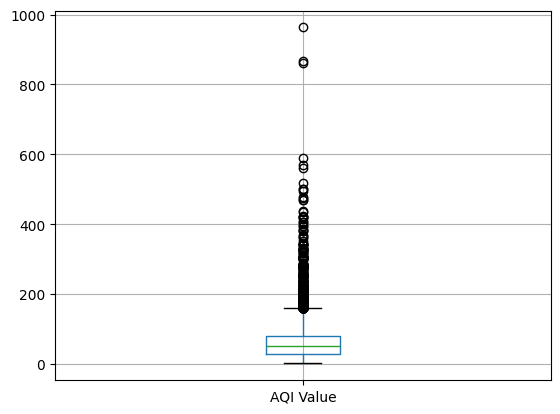

In [42]:
import matplotlib.pyplot as plt
df.boxplot(column=['AQI Value'])
plt.show()

In [43]:
# Calculating the Q1, Q3, and IQR
Q1 = df['AQI Value'].quantile(0.25)  
Q3 = df['AQI Value'].quantile(0.75)  
IQR = Q3 - Q1                       

# Calculating the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}, IQR: {IQR}")

# Counting the outliers
outliers = (df['AQI Value'] < lower_bound) | (df['AQI Value'] > upper_bound)
outlier_count = outliers.sum()
print(f"Number of outliers: {outlier_count}")

Lower Bound: -49.0, Upper Bound: 159.0, IQR: 52.0
Number of outliers: 620


#### Some plots and some results from the dataset

In [44]:
#Studying the relationship between the 10 head countries and country and status columns
top_countries = df['Country'].value_counts().head(10).index
df_top_countries = df[df['Country'].isin(top_countries)]

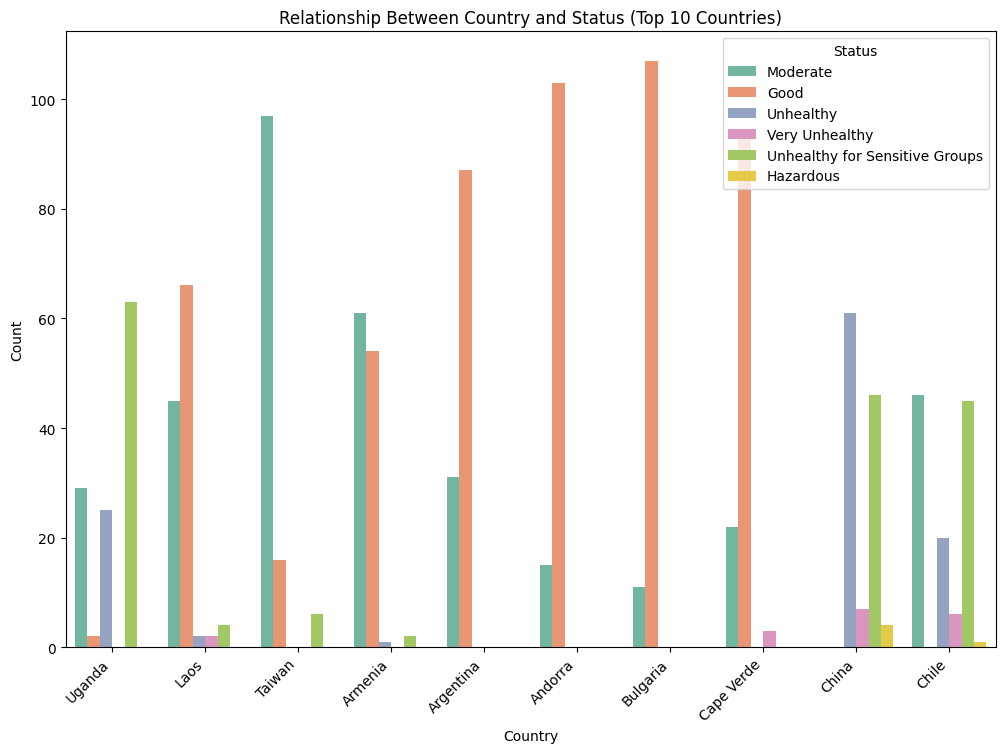

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.countplot(data=df_top_countries, x='Country', hue='Status', palette='Set2', order=top_countries)
plt.xticks(rotation=45, ha='right')  # Rotate country names for better readability
plt.title('Relationship Between Country and Status (Top 10 Countries)')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

C:\Users\cyrin\AppData\Local\Temp\ipykernel_18020\424936261.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top_countries, x='Country', y='AQI Value', palette='Set3', order=top_countries)


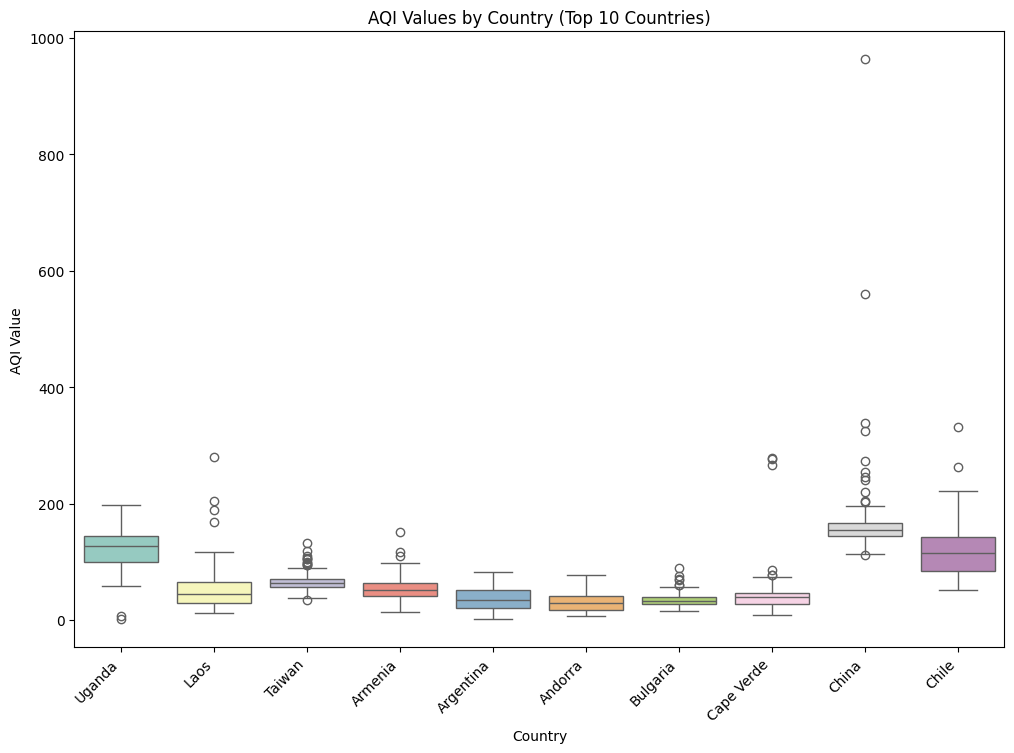

In [46]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_top_countries, x='Country', y='AQI Value', palette='Set3', order=top_countries)
plt.xticks(rotation=45, ha='right')  # Rotate country names for better readability
plt.title('AQI Values by Country (Top 10 Countries)')
plt.xlabel('Country')
plt.ylabel('AQI Value')
plt.show()

In [ ]:
#Saving the cleaned dataset to use it later to train the model
df.to_csv('dataset/cleaned_dataset.csv', index=False)